### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [6]:
print(trainY.shape)
print('First 5 examples are: ', trainY[0:5])

(60000,)
First 5 examples are:  [9 0 0 3 0]


In [7]:
# dataset have 10 classes and each label is an integer between 0 and 9:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
print(trainY.shape)
print('First 5 examples are: ', trainY[0:5])

(60000, 10)
First 5 examples are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

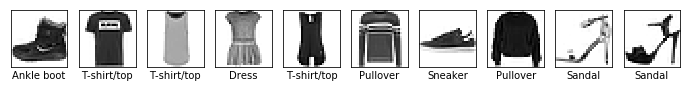

label for each of the above image: 
 [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [11]:
labelCode = []
plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
   # plt.imshow(trainX[i], cmap='Greys') 
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    label = np.where(trainY[i] == 1)[0][0]
    plt.xlabel(class_names[label])
    labelCode.append(label)
plt.show()

print("label for each of the above image: \n", labelCode)

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [12]:
# input size
print("Input Dimension: %d x %d" %(trainX.shape[1],trainX.shape[2]))

Input Dimension: 28 x 28


In [13]:
#Initialize Sequential model
model = keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(keras.layers.Reshape((784,),input_shape=(trainX.shape[1],trainX.shape[2],)))

#Add Dense Layer with 10 neurons as we have 10 classes after applying softmax
model.add(keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [14]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=5,
          batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 14.5051 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


In [15]:
test_loss, test_acc = model.evaluate(testX, testY)
print('\nTest accuracy: %0.2f' %(test_acc*100))

10000/10000 [==============================] - 0s 21us/step

Test accuracy: 10.00


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [16]:
#Initialize Sequential model
model = keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(keras.layers.Reshape((784,),input_shape=(trainX.shape[1],trainX.shape[2],)))

#Normalize the data
model.add(keras.layers.BatchNormalization())

#Add Dense Layer with 10 neurons as we have 10 classes after applying softmax
model.add(keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [17]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.5987 - acc: 0.7943 - val_loss: 0.5214 - val_acc: 0.8210
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.4896 - acc: 0.8300 - val_loss: 0.4884 - val_acc: 0.8300
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.4685 - acc: 0.8381 - val_loss: 0.4887 - val_acc: 0.8307
Epoch 4/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.4590 - acc: 0.8412 - val_loss: 0.4734 - val_acc: 0.8375
Epoch 5/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.4512 - acc: 0.8428 - val_loss: 0.4689 - val_acc: 0.8382
Epoch 6/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.4434 - acc: 0.8470 - val_loss: 0.4670 - val_acc: 0.8392
Epoch 7/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.4407 - acc: 0.8479 - val_loss: 0.4729 - val_acc

In [18]:
test_loss, test_acc = model.evaluate(testX, testY)
print('\nTest accuracy:[With Batch Normalization]: %0.2f' %(test_acc*100))

10000/10000 [==============================] - 0s 32us/step

Test accuracy:[With Batch Normalization]: 84.18


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [19]:
# Customize the learning rate to 0.001 in sgd optimizer
lr=0.001
sgd_optimizer = keras.optimizers.SGD(lr=lr)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.4194 - acc: 0.8546 - val_loss: 0.4590 - val_acc: 0.8436
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.4166 - acc: 0.8556 - val_loss: 0.4565 - val_acc: 0.8416
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.4152 - acc: 0.8565 - val_loss: 0.4562 - val_acc: 0.8440
Epoch 4/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.4147 - acc: 0.8563 - val_loss: 0.4581 - val_acc: 0.8429
Epoch 5/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.4156 - acc: 0.8551 - val_loss: 0.4573 - val_acc: 0.8435
Epoch 6/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.4138 - acc: 0.8551 - val_loss: 0.4527 - val_acc: 0.8426
Epoch 7/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.4136 - acc: 0.8574 - val_loss: 0.4606 - val_acc

In [21]:
test_loss, test_acc = model.evaluate(testX, testY)
print('\nTest accuracy:[With sgd optimizer, learning rate= %f]: %0.2f' %(lr, test_acc*100))

10000/10000 [==============================] - 0s 28us/step

Test accuracy:[With sgd optimizer, learning rate= 0.001000]: 84.31


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [26]:
#Initialize Sequential model
model = keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(keras.layers.Reshape((784,),input_shape=(trainX.shape[1],trainX.shape[2],)))

#Normalize the data
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(100, activation='sigmoid'))

model.add(keras.layers.Dense(100, activation='sigmoid'))

#Add Dense Layer with 10 neurons as we have 10 classes after applying softmax
model.add(keras.layers.Dense(10, activation='softmax'))

# Customize sgd optimizer
sgd_optimizer = keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

### Run the model

In [27]:
history = model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 103us/step - loss: 1.0441 - acc: 0.6879 - val_loss: 0.6435 - val_acc: 0.7754
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.5706 - acc: 0.7985 - val_loss: 0.5144 - val_acc: 0.8169
Epoch 3/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.4893 - acc: 0.8270 - val_loss: 0.4677 - val_acc: 0.8343
Epoch 4/50
60000/60000 [==============================] - 5s 92us/step - loss: 0.4500 - acc: 0.8404 - val_loss: 0.4480 - val_acc: 0.8368
Epoch 5/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.4256 - acc: 0.8477 - val_loss: 0.4309 - val_acc: 0.8437
Epoch 6/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.4109 - acc: 0.8535 - val_loss: 0.4182 - val_acc: 0.8494
Epoch 7/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.3954 - acc: 0.8582 - val_loss: 0.4078 - val_ac

In [28]:
test_loss, test_acc = model.evaluate(testX, testY)
print('\nTest accuracy: %0.2f' %(test_acc*100))

10000/10000 [==============================] - 0s 38us/step

Test accuracy: 88.06


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


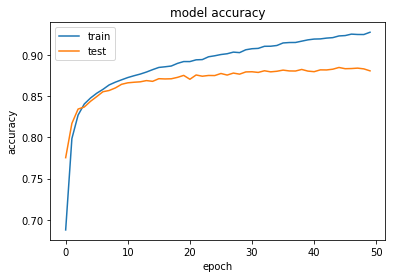

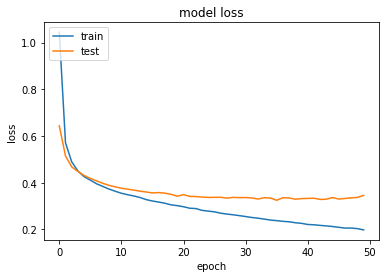

In [29]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()